In [26]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import shap
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 
import os

In [27]:
train_df = pd.read_csv("../input/nslkdd/KDDTrain+.txt")
test_df = pd.read_csv("../input/nslkdd/KDDTest+.txt" )

In [28]:
train_df.head()

0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0  0  udp    other   SF  146     0    0    0    0    0    0    0    0    0   
1  0  tcp  private   S0    0     0    0    0    0    0    0    0    0    0   
2  0  tcp     http   SF  232  8153    0    0    0    0    0    1    0    0   
3  0  tcp     http   SF  199   420    0    0    0    0    0    1    0    0   
4  0  tcp  private  REJ    0     0    0    0    0    0    0    0    0    0   

   0.10  0.11  0.12  0.13  0.14  0.15  0.16  0.18    2  2.1  0.00  0.00.1  \
0     0     0     0     0     0     0     0     0   13    1   0.0     0.0   
1     0     0     0     0     0     0     0     0  123    6   1.0     1.0   
2     0     0     0     0     0     0     0     0    5    5   0.2     0.2   
3     0     0     0     0     0     0     0     0   30   32   0.0     0.0   
4     0     0     0     0     0     0     0     0  121   19   0.0     0.0   

   0.00.2  0.00.3  1.00  0.00.4  0.00.5  150   25  0.17  0.03  0.17.1  0.00.6  \
0     0.0     0.0  0.08    0.15    0.00  255    1  0.00  0.60    0.88    0.00   
1     0.0     0.0  0.05    0.07    0.00  255   26  0.10  0.05    0.00    0.00   
2     0.0     0.0  1.00    0.00    0.00   30  255  1.00  0.00    0.03    0.04   
3     0.0     0.0  1.00    0.00    0.09  255  255  1.00  0.00    0.00    0.00   
4     1.0     1.0  0.16    0.06    0.00  255   19  0.07  0.07    0.00    0.00   

   0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.00    0.00   0.0    0.00   normal  15  
1    1.00    1.00   0.0    0.00  neptune  19  
2    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00   1.0    1.00  neptune  21

In [29]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])
train_df.columns=columns

In [30]:
test_df.columns=columns

In [31]:
train_df.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          1                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0     13   
1                 0                  0              0               0    123   
2                 0                  0              0               0      5   
3                 0                  0              0               0     30   
4                 0                  0              0               0    121   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          1          0.0              0.0          0.0              0.0   
1          6          1.0              1.0          0.0              0.0   
2          5          0.2              0.2          0.0              0.0   
3         32          0.0              0.0          0.0              0.0   
4         19          0.0              0.0          1.0              1.0   

   same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0           0.08           0.15                0.00             255   
1           0.05           0.07                0.00             255   
2           1.00           0.00                0.00              30   
3           1.00           0.00                0.09             255   
4           0.16           0.06                0.00             255   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                   1                    0.00                    0.60   
1                  26                    0.10                    0.05   
2                 255                    1.00                    0.00   
3                 255                    1.00                    0.00   
4                  19                    0.07                    0.07   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.88                         0.00   
1                         0.00                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                   0.0   
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   

   dst_host_srv_

In [32]:
train_df.shape

(125972, 43)

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [34]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [35]:
for column in train_df.select_dtypes(include=['object']).columns:
    print(f"Unique values in column '{column}':")
    print(train_df[column].unique())
    print("\n")

Unique values in column 'protocol_type':
['udp' 'tcp' 'icmp']


Unique values in column 'service':
['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']


Unique values in column 'flag':
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


Unique values in column 'outcome':
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 

In [36]:
train_df.describe()

duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised     root_shell   su_attempted  \
count  125972.000000    125972.000000  125972.000000  125972.000000   
mean        0.395739         0.279253       0.001342       0.001103   
std         0.489011        23.942137       0.036603       0.045155   
min         0.000000         0.000000       0.000000       0.000000   
25%         0.000000         0.000000       0.000000       0.000000   
50%         0.000000         0.000000       0.000000       0.000000   
75%         1.000000         0.000000       0.000000       0.000000   
max         1.000000      7479.000000       1.000000       2.000000   

            num_root  num_file_creations     num_shells  num_access_files  \
count  125972.000000       125972.000000  125972.000000     125972.000000   
mean        0.302194            0.012669       0.000413          0.004096   
std        24.399715            0.483937       0.022181          0.099370   
min         0.000000            0.000000       0.000000          0.000000   
25%         0.000000            0.000000       0.000000          0.000000   
50%         0.000000            0.000000       0.000000          0.000000   
75%         0.000000            0.000000       0.000000          0.000000   
max      7468.000000           43.000000       2.000000          9.000000   

       num_outbound_cmds  is_host_login  is_guest_login          count  \
count           125972.0  125972.000000   125972.000000  125972.000000   
mean                 0.0       0.000008        0.009423      84.108207   
std                  0.0       0.002817        0.096613     114.508828   
min                  0.0       0.000000        0.000000       0.000000   
25%                  0.0       0.000000        0.000000       2.000000   
50%                  0.0       0.000000        0.000000      14.000000   
75%                  0.0       0.000000        0.000000     143.000000   
max                  0.0       1.000000        1.000000     511.000000   

           srv_count    serror_rate  srv_serror_rate    rerror_rate  \
count  125972.000000  125972.000000    125972.000000  125972.000000   
mean       27.738093       0.284487         0.282488       0.119959   
std        72.636092       0.446457         0.447024       0.320437   
min         0.000000       0.000000         0.000000       0.000000   
25%         2.000000       0.000000         0.000000       0.000000   
50%         8.000000       0.000000         0.000000       0.000000   
75%        18.000000       1.000000         1.000000       0.000000   
max       511.000000       1.000000         1.000000       1.000000   

       srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
count    125972.000000  

In [37]:
train_df['outcome'] = train_df['outcome'].apply(lambda x: 0 if x == 'normal' else 1)

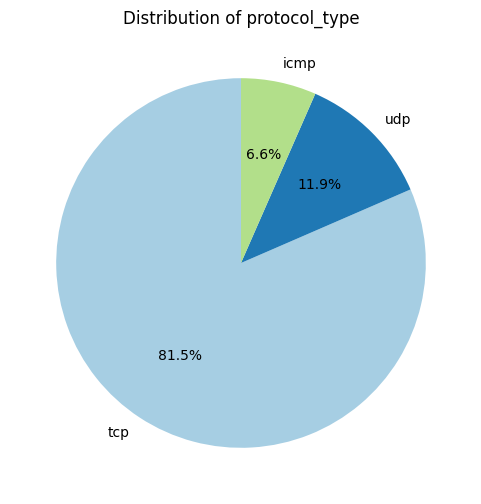

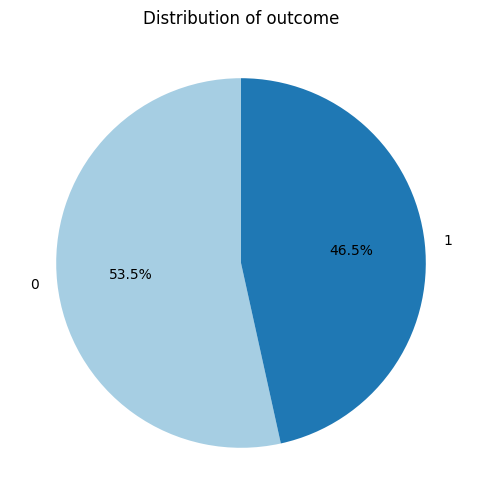

In [38]:

columns_to_plot = ['protocol_type', 'outcome']
for col in columns_to_plot:
    plt.figure(figsize=(6, 6))
    
    value_counts = train_df[col].value_counts()
    
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    
    plt.title(f'Distribution of {col}')
    
    plt.show()


In [39]:

def scale_numeric_columns(df_numeric, column_names):
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(df_numeric)
    scaled_df = pd.DataFrame(scaled_data, columns=column_names)
    return scaled_df

categorical_columns = ['is_host_login', 'protocol_type', 'service', 'flag', 
                       'land', 'logged_in', 'is_guest_login', 'level']

def preprocess_data(df):
    df_numeric = df.drop(categorical_columns, axis=1)
    numeric_columns = df_numeric.columns
    
    scaled_numeric_df = scale_numeric_columns(df_numeric, numeric_columns)
    
    df.drop(columns=numeric_columns, inplace=True)
    df[numeric_columns] = scaled_numeric_df
    
    df = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'])
    
    return df


In [40]:
train_preprocess = preprocess_data(train_df)

In [41]:


kernel_evaluations = {}

def assess_classification(model, model_name, X_train, X_test, y_train, y_test):
    # Calculate metrics for training and testing datasets
    train_acc = metrics.accuracy_score(y_train, model.predict(X_train))
    test_acc = metrics.accuracy_score(y_test, model.predict(X_test))

    train_prec = metrics.precision_score(y_train, model.predict(X_train))
    test_prec = metrics.precision_score(y_test, model.predict(X_test))

    train_rec = metrics.recall_score(y_train, model.predict(X_train))
    test_rec = metrics.recall_score(y_test, model.predict(X_test))

    kernel_evaluations[str(model_name)] = [train_acc, test_acc, train_prec, test_prec, train_rec, test_rec]

    print(f"Training Accuracy for {model_name}: {train_acc * 100:.2f}%  |  Test Accuracy for {model_name}: {test_acc * 100:.2f}%")
    print(f"Training Precision for {model_name}: {train_prec * 100:.2f}%  |  Test Precision for {model_name}: {test_prec * 100:.2f}%")
    print(f"Training Recall for {model_name}: {train_rec * 100:.2f}%  |  Test Recall for {model_name}: {test_rec * 100:.2f}%")

    actual_values = y_test
    predicted_values = model.predict(X_test)
    conf_matrix = metrics.confusion_matrix(actual_values, predicted_values)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(False)
    cm_display.plot(ax=ax)
    plt.title(f"{model_name}")
    
    if isinstance(model, DecisionTreeClassifier):
        plt.figure(figsize=(120, 115))  
        plot_tree(model, 
                   feature_names=X.columns, 
                   class_names=['normal', 'attack'],  
                   filled=True, 
                   rounded=True, 
                   fontsize=12)
        plt.title("Decision Tree Visualization")
        plt.show()


Evaluating Logistic Regression...
Training Accuracy for Logistic Regression: 96.75%  |  Test Accuracy for Logistic Regression: 96.54%
Training Precision for Logistic Regression: 96.88%  |  Test Precision for Logistic Regression: 96.52%
Training Recall for Logistic Regression: 96.10%  |  Test Recall for Logistic Regression: 96.08%
Evaluating KNN...
Training Accuracy for KNN: 99.45%  |  Test Accuracy for KNN: 99.23%
Training Precision for KNN: 99.50%  |  Test Precision for KNN: 99.21%
Training Recall for KNN: 99.31%  |  Test Recall for KNN: 99.14%
Evaluating Naive Bayes...
Training Accuracy for Naive Bayes: 91.80%  |  Test Accuracy for Naive Bayes: 91.61%
Training Precision for Naive Bayes: 92.63%  |  Test Precision for Naive Bayes: 92.53%
Training Recall for Naive Bayes: 89.48%  |  Test Recall for Naive Bayes: 89.30%
Evaluating Decision Tree...
Training Accuracy for Decision Tree: 99.99%  |  Test Accuracy for Decision Tree: 99.87%
Training Precision for Decision Tree: 100.00%  |  Test P

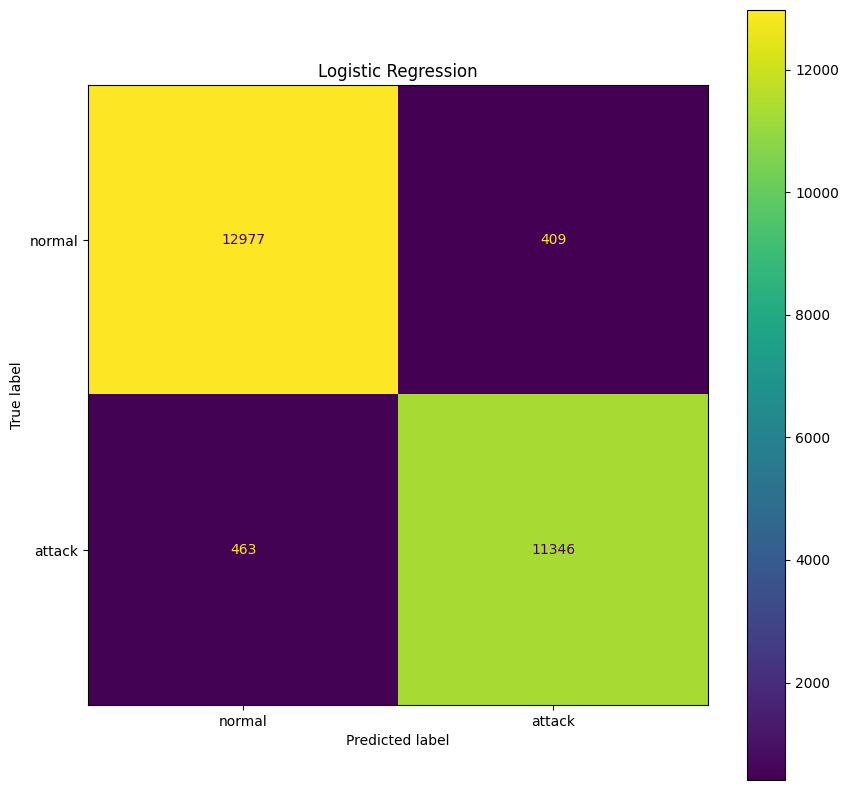

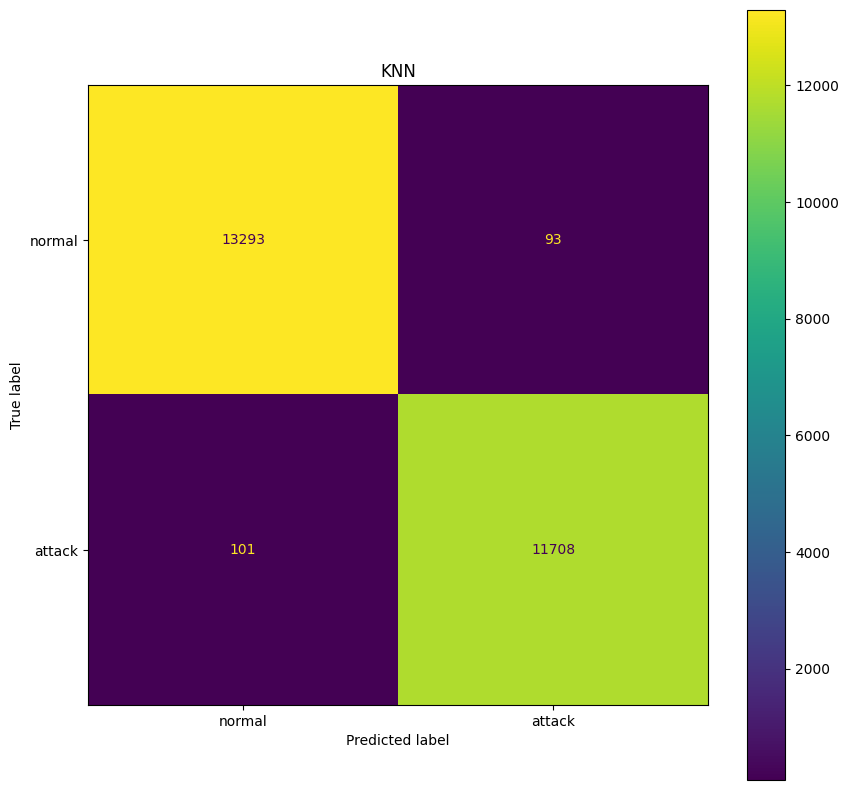

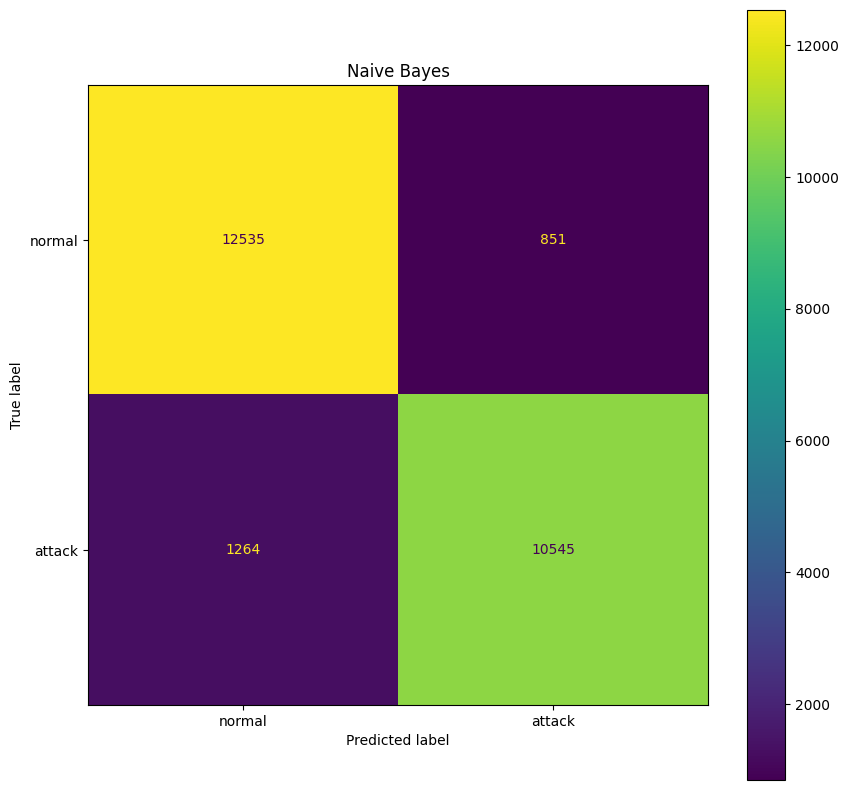

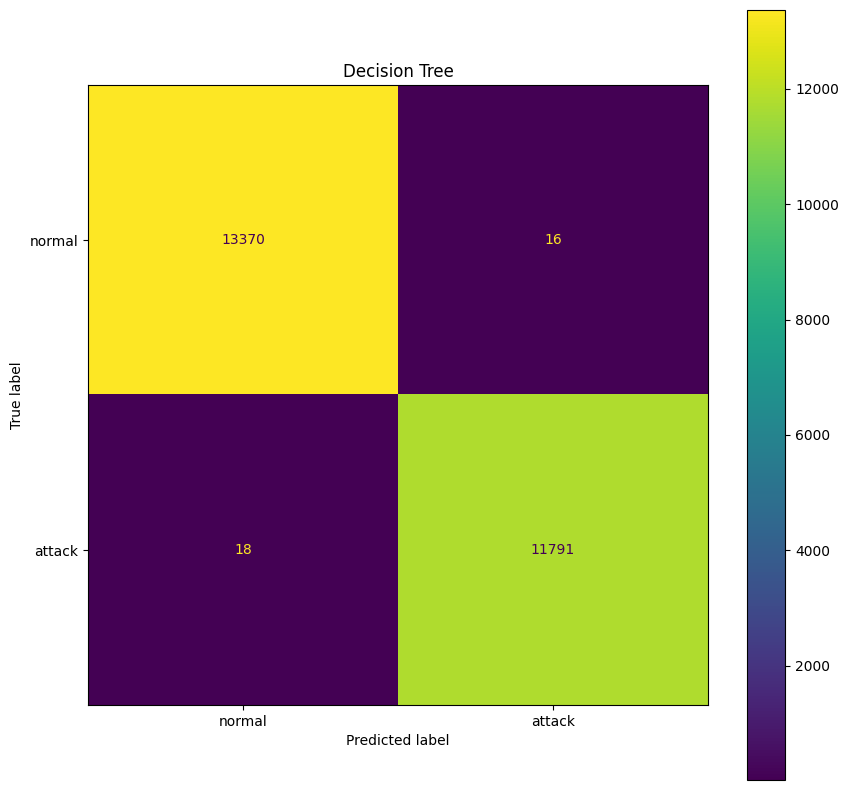

Evaluating Random Forest...
Training Accuracy for Random Forest: 99.99%  |  Test Accuracy for Random Forest: 99.89%
Training Precision for Random Forest: 100.00%  |  Test Precision for Random Forest: 99.97%
Training Recall for Random Forest: 99.99%  |  Test Recall for Random Forest: 99.80%
Evaluating AdaBoost...
Training Accuracy for AdaBoost: 99.22%  |  Test Accuracy for AdaBoost: 99.17%
Training Precision for AdaBoost: 99.27%  |  Test Precision for AdaBoost: 99.17%
Training Recall for AdaBoost: 99.04%  |  Test Recall for AdaBoost: 99.05%
Evaluating Gradient Boost...
Training Accuracy for Gradient Boost: 99.59%  |  Test Accuracy for Gradient Boost: 99.51%
Training Precision for Gradient Boost: 99.59%  |  Test Precision for Gradient Boost: 99.58%
Training Recall for Gradient Boost: 99.53%  |  Test Recall for Gradient Boost: 99.37%
Evaluating XGBoost...
Training Accuracy for XGBoost: 99.99%  |  Test Accuracy for XGBoost: 99.91%
Training Precision for XGBoost: 99.98%  |  Test Precision f

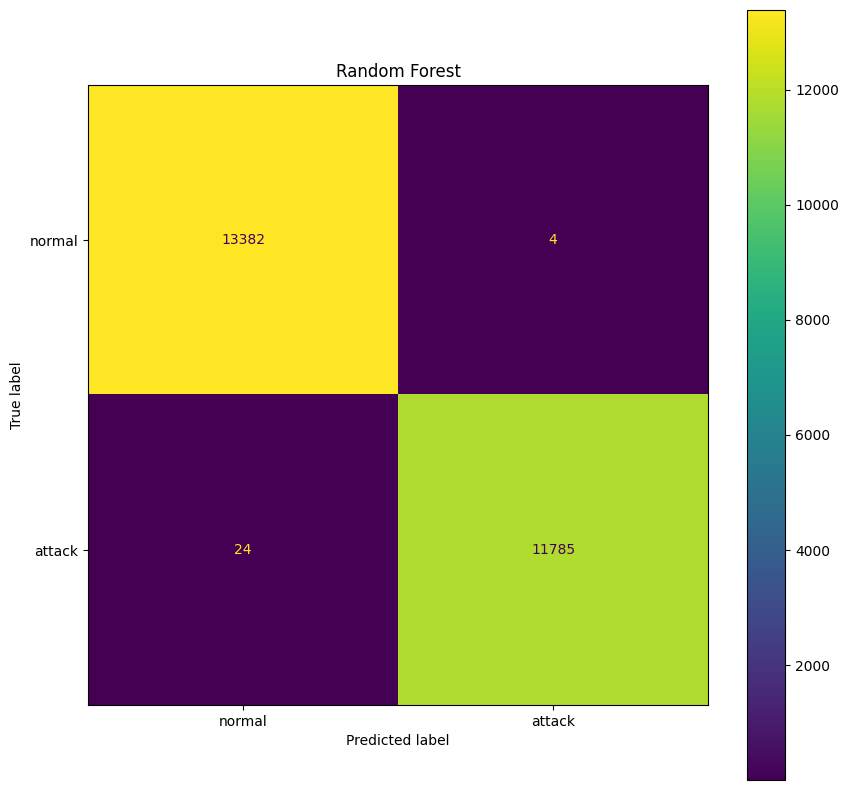

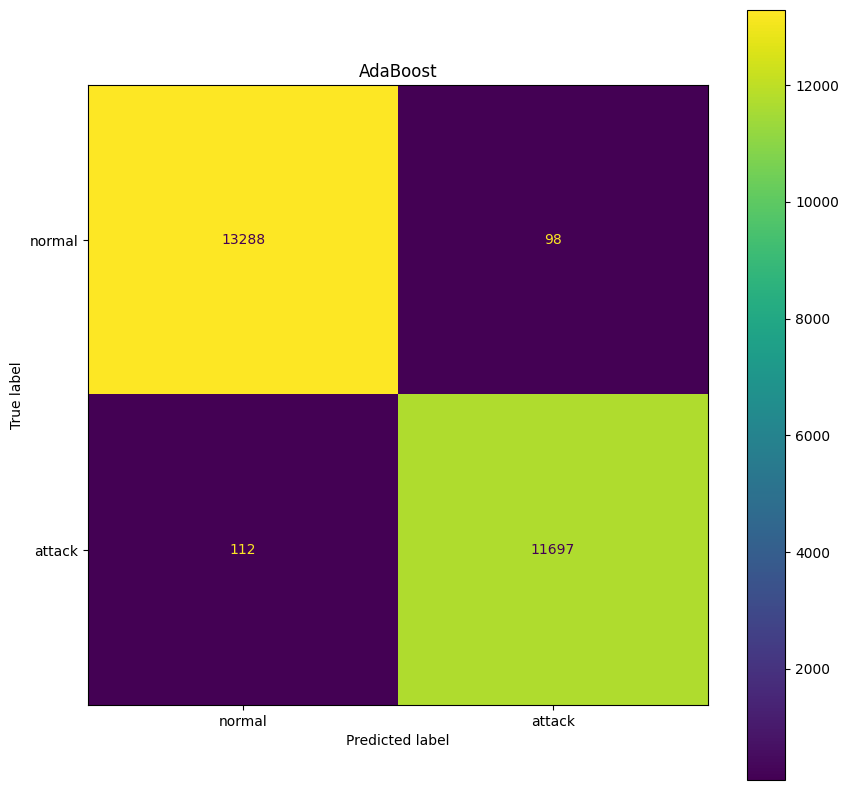

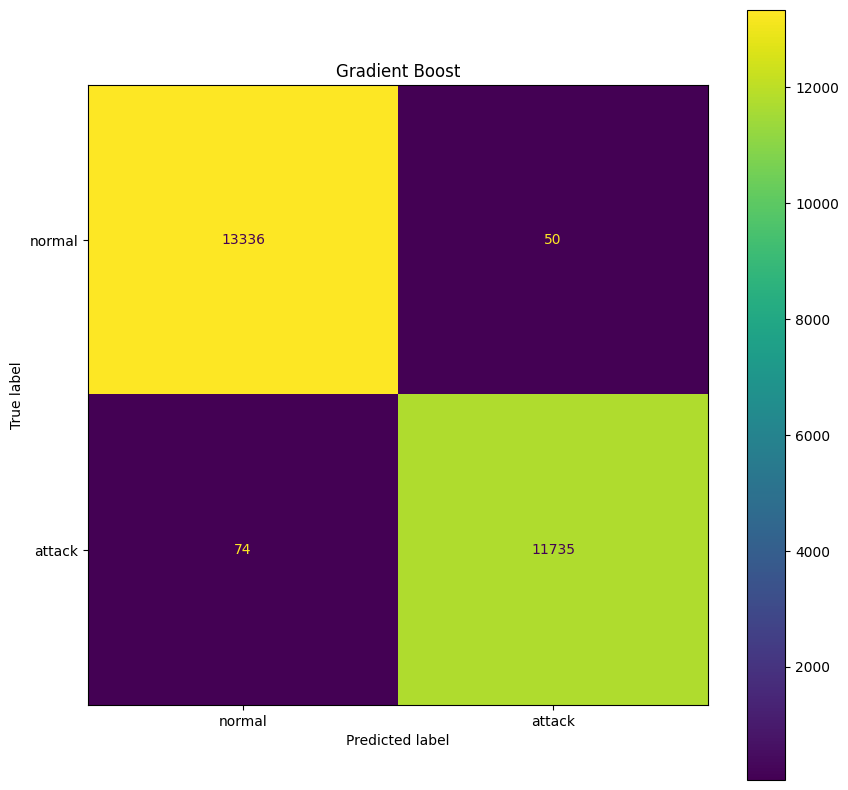

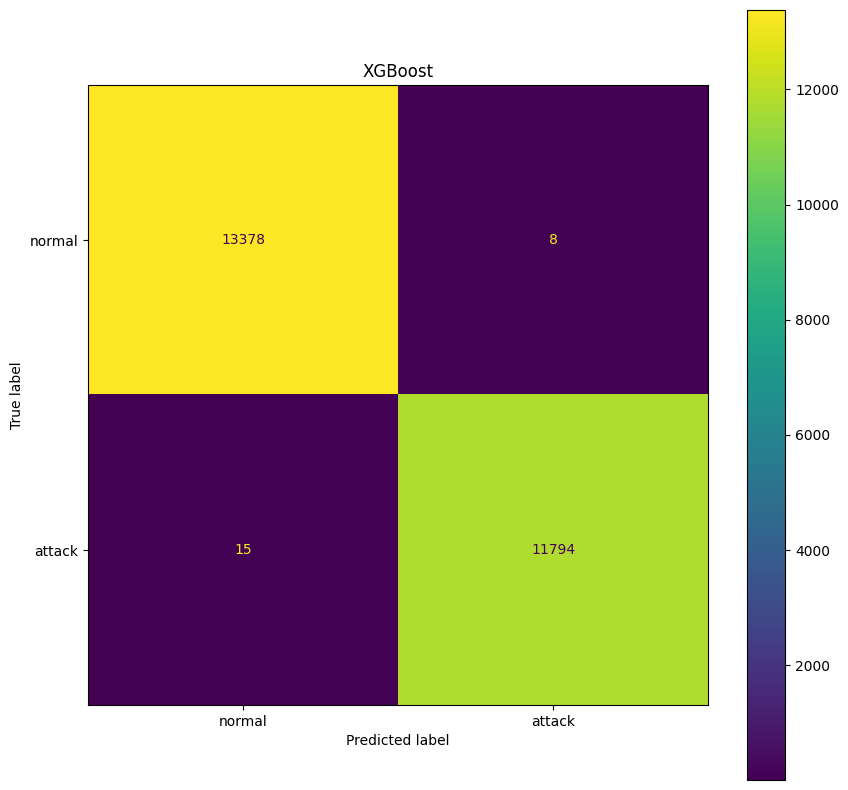

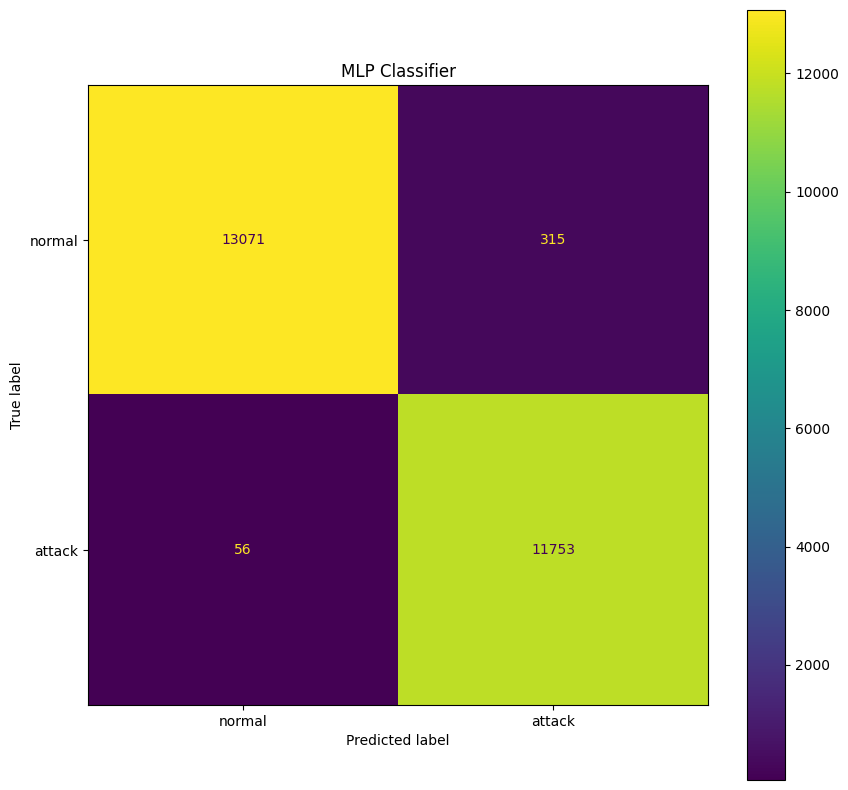

In [42]:

X = train_preprocess.drop(['outcome', 'level'], axis=1)
y = train_preprocess['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP Classifier": MLPClassifier(max_iter=1000)
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    assess_classification(model, model_name, X_train, X_test, y_train, y_test)


Evaluating Logistic Regression...
Evaluating KNN...
Evaluating Naive Bayes...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating AdaBoost...
Evaluating Gradient Boost...
Evaluating XGBoost...
Evaluating MLP Classifier...


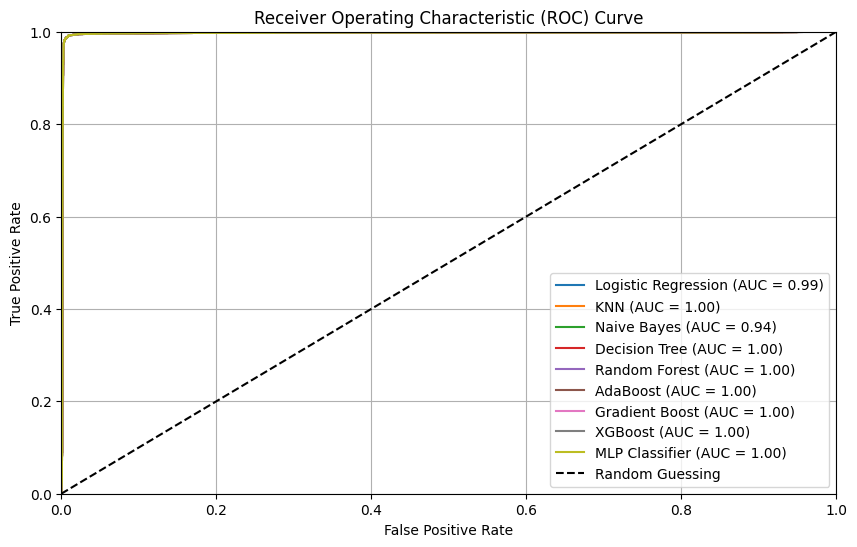

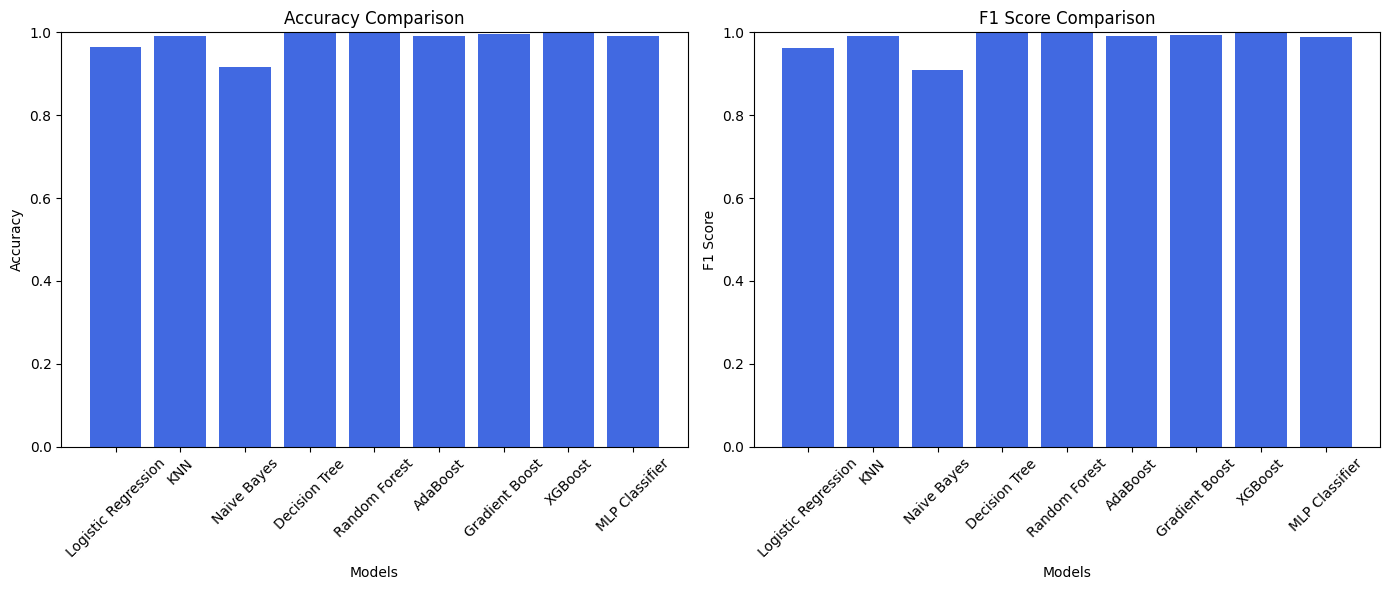

In [44]:

roc_auc = {}
accuracies = {}
f1_scores = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracies[model_name] = accuracy
    f1_scores[model_name] = f1
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc[model_name] = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
for model_name in models.keys():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc[model_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
metrics = [accuracies, f1_scores]
metrics_names = ['Accuracy', 'F1 Score']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, metric, name in zip(axes, metrics, metrics_names):
    ax.bar(metric.keys(), metric.values(), color='royalblue')
    ax.set_title(f'{name} Comparison')
    ax.set_ylabel(name)
    ax.set_xlabel('Models')
    ax.set_xticklabels(metric.keys(), rotation=45)
    ax.set_ylim(0, 1) 

plt.tight_layout()
plt.show()


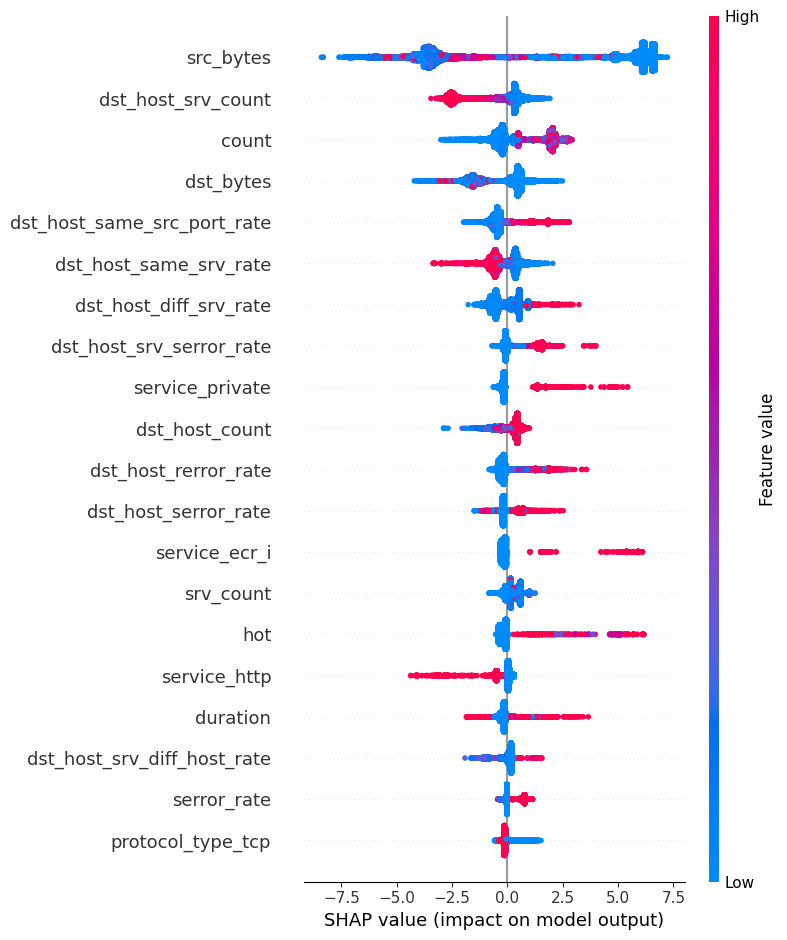

In [43]:

xgb_model = models["XGBoost"]

explainer = shap.Explainer(xgb_model)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

